# Problema
Implementación de la regresión lineal

# Instrucciones
Generar una implementación correcta de la regresión lineal usando el descenso del gradiente como método de optimización de los pesos y compararlo con la implementación directa de la librería sklearn (los valores de w y b no serán exactamente iguales pero muy similares)

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [45]:
# Generación del dataset
np.random.seed(0)  # Para reproducibilidad
X = np.random.uniform(1, 10, 5000)  # Generar 5000 valores aleatorios para las horas de estudio
error = np.random.normal(0, 5, 5000)  # Generar errores aleatorios
y = 50 + 5 * X + error  # Generar la puntuación del examen

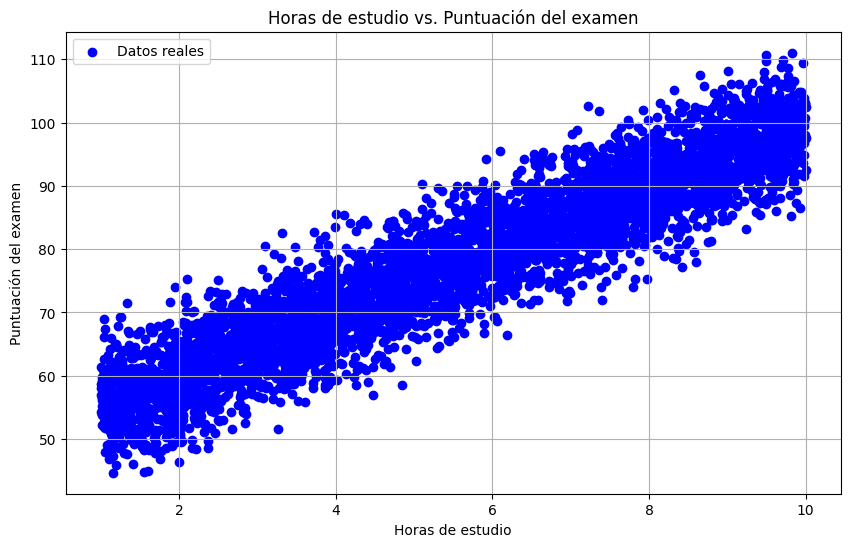

In [46]:
# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# 80 % TRAIN Y VAL 20 % TEST

# A COMPLETAR

# Dividir los datos en 80% de entrenamiento y validación, y 20% de prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento y validación en 80% de entrenamiento y 20% de validación
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print('Datos de Entrenamiento:', X_train.shape[0])
print('Datos de Validación:', X_val.shape[0])
print('Datos de Test:', X_test.shape[0])

Datos de Entrenamiento: 3200
Datos de Validación: 800
Datos de Test: 1000


In [48]:
# Función de costo (Mean Squared Error)
def cost_function(y_true, y_pred):
    # A COMPLETAR
    # Calcular la diferencia entre las predicciones y los valores verdaderos
    diff = y_pred - y_true
    # Calcular el cuadrado de la diferencia
    squared_diff = diff ** 2
    # Calcular el promedio del cuadrado de las diferencias
    mean_squared_error = np.mean(squared_diff)
    return mean_squared_error

In [49]:
# Gradiente descendente para ajustar los parámetros del modelo

    # A COMPLETAR
    # 1. Inicializar los coeficientes (pesos) w y b
    # 2. bucle que itere por epoch
    # 3. Calcular y_pred del conjunto de entrenamiento por epoch
    # 4. Calcular las pérdidas de entrenamiento y almacenarlas en una lista por epoch [train_loss_per_epoch]
    # 5. Calcular los gradientes para los pesos w y b
        # gradiente de b es la derivada de la función de coste con respecto a b: (-2 / n) * [suma de la diferencia entre el valor predicho y la etiqueta]
        # gradiente de w es la derivada de la función de coste con respecto a w: (-2 / n) * [suma de la diferencia entre el valor predicho y la etiqueta] * [carácterísticas de las muestras]
    # 6. Actualizar los pesos w y b (que será el valor actual del peso menos el learning rate por el gradiente del peso)
    # 7. Calcular y_pred del conjunto de validación por epoch
    # 8. Calcular las pérdidas de validación y almacenarlas en una lista por epoch [val_loss_per_epoch]

def train_regression(X_train, y_train, X_val, y_val, lr, epochs):
    # Inicializar los coeficientes (pesos) w y b
    w = np.random.randn(X_train.shape[1]) if len(X_train.shape) > 1 else np.random.randn(1)
    b = np.random.randn()  # Inicializar b con un valor aleatorio

    train_loss_per_epoch = []
    val_loss_per_epoch = []

    for epoch in range(epochs):
        # Calcular y_pred del conjunto de entrenamiento por epoch
        y_pred_train = np.dot(X_train, w) + b if len(X_train.shape) > 1 else X_train * w + b

        # Calcular las pérdidas de entrenamiento
        train_loss = cost_function(y_train, y_pred_train)
        train_loss_per_epoch.append(train_loss)

        # Calcular los gradientes para los pesos w y b
        dw = (-2 / len(X_train)) * np.dot(X_train.T, (y_train - y_pred_train)) if len(X_train.shape) > 1 else (-2 / len(X_train)) * np.sum(X_train * (y_train - y_pred_train))
        db = (-2 / len(X_train)) * np.sum(y_train - y_pred_train)

        # Actualizar los pesos w y b
        w -= lr * dw
        b -= lr * db

        # Calcular y_pred del conjunto de validación por epoch
        y_pred_val = np.dot(X_val, w) + b if len(X_val.shape) > 1 else X_val * w + b

        # Calcular las pérdidas de validación
        val_loss = cost_function(y_val, y_pred_val)
        val_loss_per_epoch.append(val_loss)

    return w, b, train_loss_per_epoch, val_loss_per_epoch




In [50]:
# Hiperparámetros
lr = 0.01  # Tasa de aprendizaje (puedes ajustar este valor según sea necesario)
epochs = 1000  # Número de épocas (puedes ajustar este valor según sea necesario)

# Entrenar el modelo
w, b, train_loss_per_epoch, val_loss_per_epoch = train_regression(X_train, y_train, X_val, y_val, lr=lr, epochs=epochs)

# Imprimir los resultados
print("Pesos (w):", w)
print("Bias (b):", b)


Pesos (w): [5.23637035]
Bias (b): 48.334636534523185


 Esto significa que el modelo predice la puntuación del examen como y_pred = 5.23553984 * X + 48.340152797327235

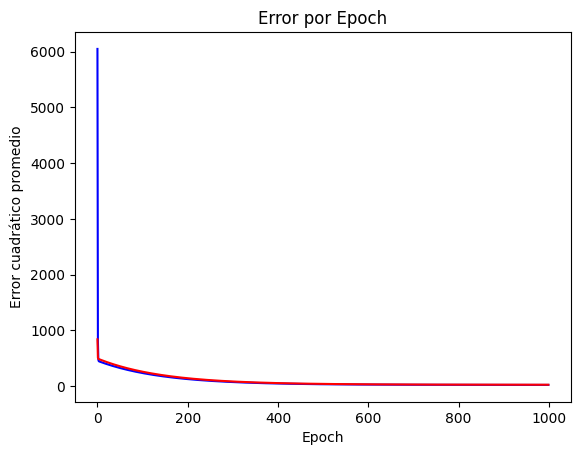

In [51]:
# Visualización del error de entrenamiento por epoch
plt.figure()
plt.plot(range(epochs), train_loss_per_epoch, '-b')
plt.plot(range(epochs), val_loss_per_epoch, '-r')
plt.xlabel('Epoch')
plt.ylabel('Error cuadrático promedio')
plt.title('Error por Epoch')
plt.show()



Costo del modelo: 25.893863023170482


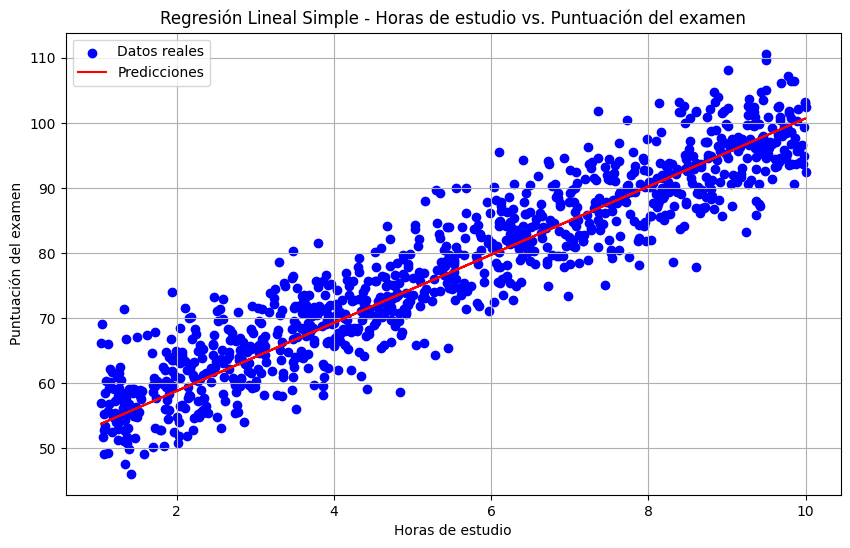

In [53]:
# Realizar predicciones en test
y_pred = X_test * w + b

# Calcular el costo
cost = cost_function(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()









Esto representa el error cuadrático medio entre las predicciones del modelo y los valores reales en el conjunto de prueba.

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular MSE
mse = mean_squared_error(y_test, y_pred)

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular R^2
r2 = r2_score(y_test, y_pred)

# Calcular MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)


MSE en el conjunto de test: 25.893863023170482
MAE en el conjunto de test: 4.008027153023436
R^2 en el conjunto de test: 0.8700892972916975
MAPE en el conjunto de test: 5.307593804009775


Los resultados obtenidos muestran que el:

**MSE (Error Cuadrático Medio)** en el conjunto de prueba es aproximadamente 25.89. El MSE es una medida de la calidad de una predicción. Cuanto menor sea el MSE, mejor será el modelo.

**MAE (Error Absoluto Medio)** en el conjunto de prueba es aproximadamente 4.01. El MAE es la media de las diferencias absolutas entre las predicciones del modelo y los valores reales. Cuanto menor sea el MAE, mejor será el modelo.

**R^2 (Coeficiente de Determinación)** en el conjunto de prueba es aproximadamente 0.87. El R^2 es una medida de qué tan bien se ajustan las predicciones del modelo a los valores reales. Un R^2 más cercano a 1 indica un mejor ajuste.

**MAPE (Error Porcentual Absoluto Medio) **en el conjunto de prueba es aproximadamente 5.31%. El MAPE es una medida de la precisión del modelo en términos de porcentaje del error absoluto promedio en relación con los valores reales. Cuanto menor sea el MAPE, mejor será el modelo.

Con estos resultados, podemos concluir que el modelo de regresión lineal parece tener un rendimiento bastante bueno en este conjunto de datos.

# Implementación de la regresión lineal usando sklearn

In [55]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
modelo_regresion = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_regresion.fit(X_train.reshape(-1, 1), y_train)


LinearRegression()

In [56]:
# Imprimir los coeficientes (pendiente) y el sesgo (intercepto) del modelo
print("Coeficiente (pendiente):", modelo_regresion.coef_)
print("Sesgo (intercepto):", modelo_regresion.intercept_)

# Verificar si el modelo ha sido entrenado
print("¿El modelo ha sido entrenado?:", modelo_regresion.coef_ is not None)

Coeficiente (pendiente): [5.02464467]
Sesgo (intercepto): 49.7409163841056
¿El modelo ha sido entrenado?: True


De los resultados obtenidos, podemos interpretar lo siguiente:

**Coeficiente (pendiente):** Este valor representa la pendiente de la línea de regresión, es decir, cuánto cambia la variable dependiente (en este caso, la puntuación del examen) por cada unidad de cambio en la variable independiente (en este caso, las horas de estudio). En este ejemplo, el coeficiente es aproximadamente 5.0246, lo que significa que, en promedio, por cada hora adicional de estudio, la puntuación del examen aumenta aproximadamente en 5.0246 puntos.

**Sesgo (intercepto):** Este valor representa el punto donde la línea de regresión corta el eje y cuando todas las características son iguales a cero. En este caso, el sesgo es aproximadamente 49.7409, lo que significa que cuando el número de horas de estudio es cero, la puntuación del examen esperada es de aproximadamente 49.7409 puntos.

Concluimos que estos resultados indican que el modelo de regresión lineal ha sido entrenado correctamente y que los coeficientes y el sesgo del modelo tienen valores significativos para realizar predicciones en el conjunto de prueba.

Costo del modelo: 25.252964425596577


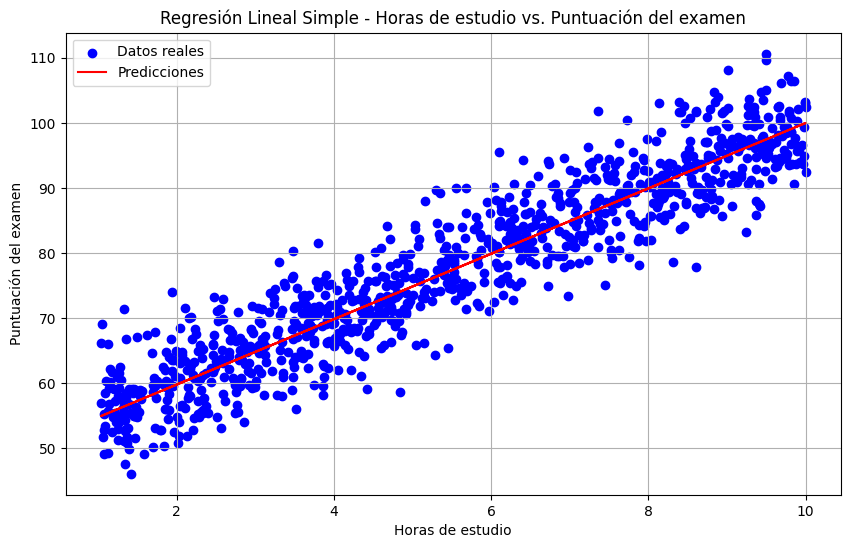

In [57]:
# Realizar predicciones en test
y_pred = modelo_regresion.predict(X_test.reshape(-1, 1))

# Calcular el costo (MSE)
cost = mean_squared_error(y_test, y_pred)

print("Costo del modelo:", cost)

# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()


En este contexto, un costo de 25.25 indica que, en promedio, las predicciones del modelo tienen un error cuadrático medio de aproximadamente 25.25 unidades de puntuación del examen. Esto significa que, en promedio, las predicciones del modelo tienden a desviarse de los valores reales en esta cantidad.

En general, un costo más bajo indica un mejor rendimiento del modelo en términos de ajuste a los datos observados.

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = modelo_regresion.predict(X_train.reshape(-1, 1))

# Calcular las métricas de evaluación
mse = mean_squared_error(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
mape = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

print("MSE en el conjunto de entrenamiento:", mse)
print("MAE en el conjunto de entrenamiento:", mae)
print("R^2 en el conjunto de entrenamiento:", r2)
print("MAPE en el conjunto de entrenamiento:", mape)


MSE en el conjunto de entrenamiento: 23.474545062495253
MAE en el conjunto de entrenamiento: 3.834987243291654
R^2 en el conjunto de entrenamiento: 0.8766302290070875
MAPE en el conjunto de entrenamiento: 5.154655008227923


Estos resultados sugieren que el modelo de regresión lineal tiene un buen rendimiento en el conjunto de entrenamiento, con un bajo error y una buena capacidad para explicar la variabilidad en la puntuación del examen.

# Comparación de parámetros obtenidos

In [60]:
b_sklearn = modelo_regresion.intercept_
w_sklearn = modelo_regresion.coef_[0]

print("Coeficiente de intercepción (b) - Manual:", b)
print("Coeficiente de pendiente (w) - Manual:", w)
print("Coeficiente de intercepción (b) - Scikit-learn:", b_sklearn)
print("Coeficiente de pendiente (w) - Scikit-learn:", w_sklearn)



Coeficiente de intercepción (b) - Manual: 48.334636534523185
Coeficiente de pendiente (w) - Manual: [5.23637035]
Coeficiente de intercepción (b) - Scikit-learn: 49.7409163841056
Coeficiente de pendiente (w) - Scikit-learn: 5.024644665080553


En general, los resultados son bastante similares entre el modelo manual y el modelo de scikit-learn, lo que sugiere que ambas implementaciones están produciendo resultados coherentes. Sin embargo, las pequeñas diferencias pueden deberse a detalles en la implementación o en los algoritmos de optimización utilizados en cada caso.